# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

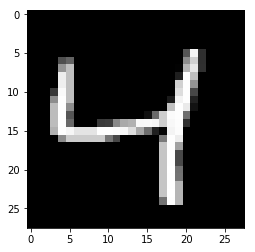

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,(None, image_size),name = 'inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name = 'targets') 

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation = None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6944
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6886
Epoch: 1/20... Training loss: 0.6851
Epoch: 1/20... Training loss: 0.6817
Epoch: 1/20... Training loss: 0.6774
Epoch: 1/20... Training loss: 0.6722
Epoch: 1/20... Training loss: 0.6646
Epoch: 1/20... Training loss: 0.6569
Epoch: 1/20... Training loss: 0.6481
Epoch: 1/20... Training loss: 0.6375
Epoch: 1/20... Training loss: 0.6257
Epoch: 1/20... Training loss: 0.6114
Epoch: 1/20... Training loss: 0.5962
Epoch: 1/20... Training loss: 0.5796
Epoch: 1/20... Training loss: 0.5644
Epoch: 1/20... Training loss: 0.5487
Epoch: 1/20... Training loss: 0.5300
Epoch: 1/20... Training loss: 0.5050
Epoch: 1/20... Training loss: 0.4906
Epoch: 1/20... Training loss: 0.4725
Epoch: 1/20... Training loss: 0.4556
Epoch: 1/20... Training loss: 0.4346
Epoch: 1/20... Training loss: 0.4207
Epoch: 1/20... Training loss: 0.4069
Epoch: 1/20... Training loss: 0.3925
Epoch: 1/20... Training loss: 0.3835
E

Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1817
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1802
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1851
E

Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1627
Epoch: 2/20... Training loss: 0.1464
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1517
E

Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1272
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1252
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1249
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1294
E

Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1199
E

Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1124
E

Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1039
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1073
E

Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1032
E

Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0998
E

Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1033
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1046
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0987
E

Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0948
E

Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0908
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0906
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0998
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0891
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0992
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0986
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0978
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0892
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0892
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0984
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0956


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

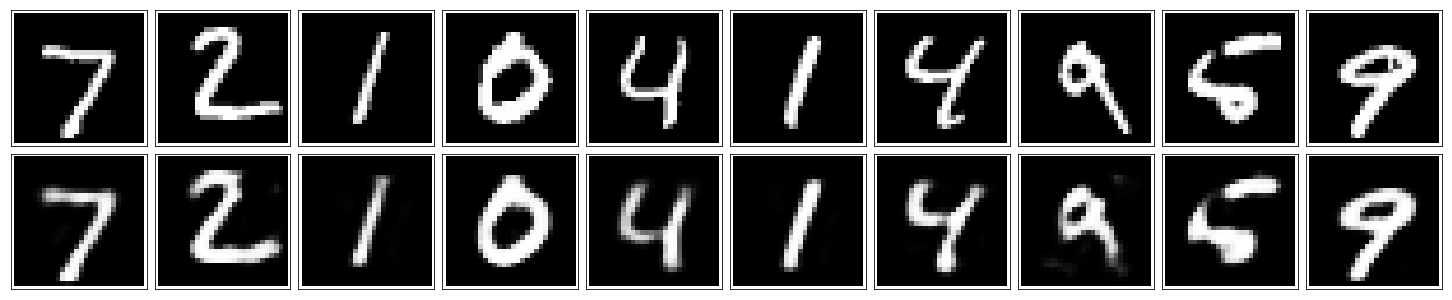

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.